In [2]:
#imports

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sqlalchemy import create_engine

In [3]:
# Create path to CSV
# Apple CSV downloaded from Kaggle
# Samsung CSV downloaded from Yahoo Finance

Apple_path = "../Resources/Apple/AAPL.csv"
Samsung_path = "../Resources/Samsung/Samsung.csv"
Samsung_phone_path = "../Resources/Samsung/Samsung phones.csv"

In [4]:
#Read in files for stocks and phone release dates

Apple_data = pd.read_csv(Apple_path)
Samsung_data = pd.read_csv(Samsung_path)
Sams_phone_data = pd.read_csv(Samsung_phone_path)

apple = pd.DataFrame(Apple_data)
samsung = pd.DataFrame(Samsung_data)
Sams_phones = pd.DataFrame(Sams_phone_data)

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
samsung.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
Sams_phones.dtypes

Phone Model     object
Release Date    object
dtype: object

In [8]:
Sams_phones.head()

,Phone Model,Release Date
0,Samsung Galaxy S I9000,2010-06-01
1,Samsung I9008 Galaxy S,2010-06-01
2,Samsung Galaxy S M110S,2010-07-01
3,Samsung Galaxy S I909,2010-10-01
4,Samsung Galaxy S Hoppin M190S,2010-11-01


In [9]:
#show Apple data
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [10]:
#filter through the dates for Apple, showing the last 5 years of data
apple_df = apple.loc[(apple['Date'] >= '2017-12-01')
                     & (apple['Date'] < '2022-12-01')]
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
166,2017-12-04,172.479996,172.619995,166.460007,169.369995,168.682251,137481100
167,2017-12-11,169.199997,174.169998,168.789993,173.970001,173.263580,139147200
168,2017-12-18,174.880005,177.199997,173.250000,175.009995,174.299362,117632400
169,2017-12-25,170.800003,171.850006,169.220001,169.229996,168.542831,97163800
170,2018-01-01,170.160004,175.369995,169.259995,175.000000,174.289398,101168400


In [11]:
#show samsung data
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-05-14,89.250000,89.250000,88.000000,88.500000,66.472954,197500
1,2001-05-15,87.239998,88.699997,87.000000,87.309998,65.579132,122000
2,2001-05-16,86.000000,87.269997,84.500000,84.750000,63.656300,278900
3,2001-05-17,89.010002,89.879997,87.000000,89.489998,67.216553,364300
4,2001-05-18,88.150002,90.000000,84.889999,89.430000,67.171478,199100


In [12]:
#filter through dates for Samsung stock, showing the last 5 years of data
samsung_df = samsung.loc[(samsung['Date'] >= '2017-12-01')
                     & (samsung['Date'] < '2022-12-01')]
samsung_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4223,2017-12-01,1177.0,1177.0,1161.0,1171.0,1008.617981,33164
4224,2017-12-04,1185.0,1185.0,1161.0,1165.0,1003.450012,33396
4225,2017-12-05,1179.0,1184.0,1168.0,1184.0,1019.815491,22455
4226,2017-12-06,1147.0,1152.0,1128.0,1151.0,991.391602,23665
4227,2017-12-07,1151.0,1178.0,1151.0,1166.0,1004.311401,27734


In [13]:
#filter through dates for Samsung phones, showing the last 5 years of phones releases
sams_phone_df = Sams_phones.loc[(Sams_phones['Release Date'] >= '2017-12-01')
                     & (Sams_phones['Release Date'] < '2022-12-01')]
sams_phone_df.head()

,Phone Model,Release Date
78,Samsung Galaxy S9,2018-03-01
79,Samsung Galaxy S9+,2018-03-01
80,Samsung Galaxy S Light Luxury,2018-05-01
81,Samsung Galaxy S10,2019-03-01
82,Samsung Galaxy S10+,2019-03-01


In [14]:
# function to reorder columns for stocks
def columns(df):
    df = df[['Date','Open','High','Low','Close','Adj Close','Volume']]
    return df

samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-05-14,89.250000,89.250000,88.000000,88.500000,66.472954,197500
1,2001-05-15,87.239998,88.699997,87.000000,87.309998,65.579132,122000
2,2001-05-16,86.000000,87.269997,84.500000,84.750000,63.656300,278900
3,2001-05-17,89.010002,89.879997,87.000000,89.489998,67.216553,364300
4,2001-05-18,88.150002,90.000000,84.889999,89.430000,67.171478,199100


In [15]:
# function to calculate difference between high and low price
def highlow(df):
    df = df.assign(Difference = lambda x: x['High'] - x['Low'])
    return df

In [16]:
# function to calculate revenue
def rev(df):
    df = df.assign(Revenue = lambda x: (x['Open'] + x['Close'])/2 * x['Volume'])
    return df

In [17]:
# function to calculate profit percent change 
def pctchg(df):
    df['Revenue Percent Change'] = df['Revenue'].pct_change()
    return df

In [18]:
# funtion for cleaning up and formatting data
def cleandat(df):
    df = df.round(2)
    df["Revenue Percent Change"] = df["Revenue Percent Change"].map('{:.2f}'.format)
    df["Revenue"] = df["Revenue"].map("{:.2f}".format)
    df["Difference"] = df["Difference"].map("{:.2f}".format)
    df["High"] = df["High"].map("{:.2f}".format)
    df["Low"] = df["Low"].map("{:.2f}".format)
    df["Open"] = df["Open"].map("{:.2f}".format)
    df["Close"] = df["Close"].map("{:.2f}".format)
    df["Adj Close"] = df["Adj Close"].map("{:.2f}".format)
    df["Volume"] = df["Volume"].map("{:.0f}".format)
    return df

In [19]:
# function to convert dtypes to string and floats for data manipulation
def astypes(df):
    df = df.astype({'Date': 'object',
                    'Open': 'float',
                    'High':'float',
                    'Low':'float',
                    'Close':'float',
                    'Adj Close':'float',
                    'Volume':'float',
                    'Revenue':'float',
                    'Revenue Percent Change':'float',
                    'Difference':'float'})
    return df

In [20]:
# create list of dfs
dfs = [samsung_df, apple_df]
# applying all functions in a for loop
for i,df in enumerate(dfs):
    df = columns(df)
    df = highlow(df)
    df = rev(df)
    df = pctchg(df)
    df = cleandat(df)
    df = astypes(df)
    display(df[:5])
    dfs=df

,Date,Open,High,Low,Close,Adj Close,Volume,Difference,Revenue,Revenue Percent Change
4223,2017-12-01,1177.0,1177.0,1161.0,1171.0,1008.62,33164.0,16.0,38934536.0,NaN
4224,2017-12-04,1185.0,1185.0,1161.0,1165.0,1003.45,33396.0,24.0,39240300.0,0.01
4225,2017-12-05,1179.0,1184.0,1168.0,1184.0,1019.82,22455.0,16.0,26530582.5,-0.32
4226,2017-12-06,1147.0,1152.0,1128.0,1151.0,991.39,23665.0,24.0,27191085.0,0.02
4227,2017-12-07,1151.0,1178.0,1151.0,1166.0,1004.31,27734.0,27.0,32129839.0,0.18


,Date,Open,High,Low,Close,Adj Close,Volume,Difference,Revenue,Revenue Percent Change
166,2017-12-04,172.48,172.62,166.46,169.37,168.68,137481100.0,6.16,2.349896e+10,NaN
167,2017-12-11,169.20,174.17,168.79,173.97,173.26,139147200.0,5.38,2.387557e+10,0.02
168,2017-12-18,174.88,177.20,173.25,175.01,174.30,117632400.0,3.95,2.057920e+10,-0.14
169,2017-12-25,170.80,171.85,169.22,169.23,168.54,97163800.0,2.63,1.651930e+10,-0.20
170,2018-01-01,170.16,175.37,169.26,175.00,174.29,101168400.0,6.11,1.745964e+10,0.06


In [43]:
# adding ticker column
#apple['Ticker'] = 'AAPL'
#samsung['Ticker'] = 'SMSN'

In [56]:
#Samsung Phone Releases in the last five years

In [57]:
data = pd.read_csv('../Resources/Samsung/Samsung phones.csv')

In [58]:
#produce total number of phones released by samsung
df = pd.read_csv('../Resources/Samsung/Samsung phones.csv')
df

,Phone Model,Release Date,Year
0,Samsung Galaxy S I9000,6/1/2010,2010
1,Samsung I9008 Galaxy S,6/1/2010,2010
2,Samsung Galaxy S M110S,7/1/2010,2010
3,Samsung Galaxy S I909,10/1/2010,2010
4,Samsung Galaxy S Hoppin M190S,11/1/2010,2010
...,...,...,...
461,Samsung Galaxy F52 5G,6/1/2021,2021
462,Samsung Galaxy F22,7/13/2021,2021
463,Samsung Galaxy F42 5G,10/3/2021,2021
464,Samsung Galaxy F23,3/16/2022,2022


In [59]:
# Calculate the number of unique phones
phone_count = len(df["Phone Model"].unique())
summary_df = pd.DataFrame({"Total Unique Phones": [phone_count]})
summary_df

,Total Unique Phones
0,465


In [60]:
#count the number of releases by year
s = df['Year'].value_counts().rename('Yearly_Releases')
df = df.join(s, on='Year')
df

,Phone Model,Release Date,Year,Yearly_Releases
0,Samsung Galaxy S I9000,6/1/2010,2010,8
1,Samsung I9008 Galaxy S,6/1/2010,2010,8
2,Samsung Galaxy S M110S,7/1/2010,2010,8
3,Samsung Galaxy S I909,10/1/2010,2010,8
4,Samsung Galaxy S Hoppin M190S,11/1/2010,2010,8
...,...,...,...,...
461,Samsung Galaxy F52 5G,6/1/2021,2021,38
462,Samsung Galaxy F22,7/13/2021,2021,38
463,Samsung Galaxy F42 5G,10/3/2021,2021,38
464,Samsung Galaxy F23,3/16/2022,2022,32


In [61]:
df['Year'].value_counts()[2017]

23

In [62]:
df['Year'].value_counts()[2018]

28

In [63]:
df['Year'].value_counts()[2019]

42

In [64]:
df['Year'].value_counts()[2020]

51

In [65]:
df['Year'].value_counts()[2021]

38

In [66]:
df['Year'].value_counts()[2022]

32

<BarContainer object of 6 artists>

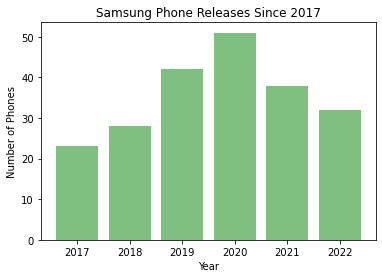

In [67]:
releases = [23, 28, 42, 51, 38, 32]
x_axis = np.arange(len(releases))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2017", "2018", "2019", "2020", "2021", "2022"])
plt.title("Samsung Phone Releases Since 2017")
plt.xlabel("Year")
plt.ylabel("Number of Phones")
plt.bar(x_axis, releases, color='g', alpha=0.5, align="center")

In [59]:
protocol = 'postgresql'
username = '<admin>'
password = '<admin>'
host = 'localhost'
port = 5432
database_name = 'customer_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

ModuleNotFoundError: No module named 'psycopg2'